In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)
asavefig.formats.jpg.use = True

from phasor.signals import power_loops
from phasor.utilities.plots.loop_plot import plot_loop

import scipy

Populating the interactive namespace from numpy and matplotlib


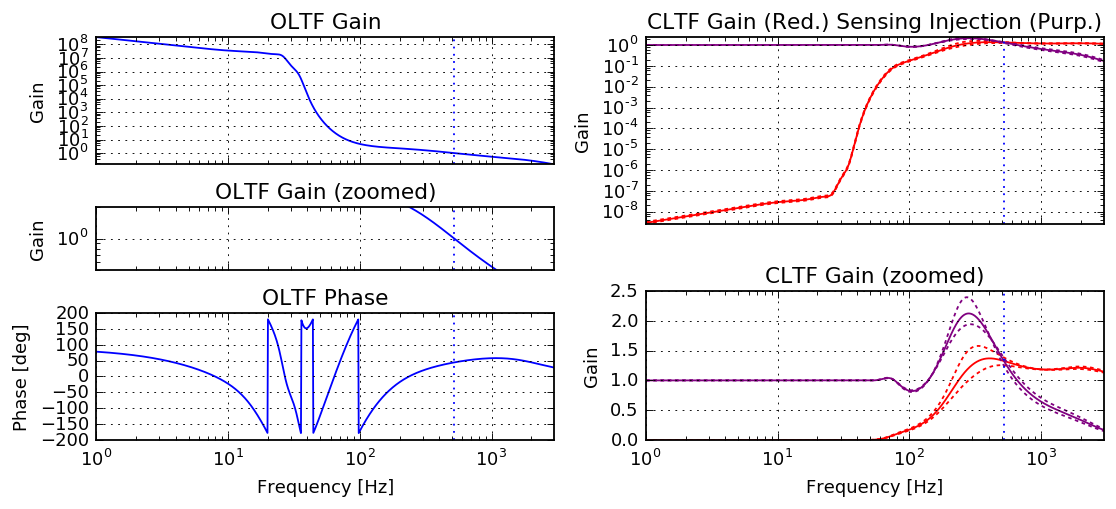

In [3]:
F = logspaced(1, 3000, 1000)

Fx, hd = scipy.signal.freqresp(
    power_loops.controller_10x1e3_20x1e8(UGF = 500.), 
    F)

axF = plot_loop(F, hd, full = True)


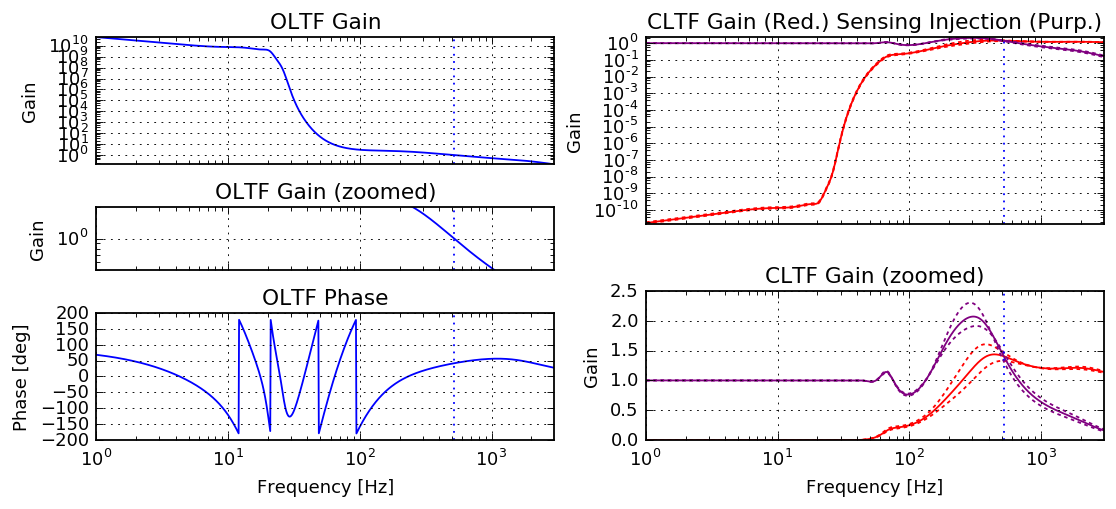

In [4]:
F = logspaced(1, 3000, 1000)

Fx, hd = scipy.signal.freqresp(
    power_loops.controller_20x1e9(UGF = 500.), 
    F)

axF = plot_loop(F, hd, full = True)


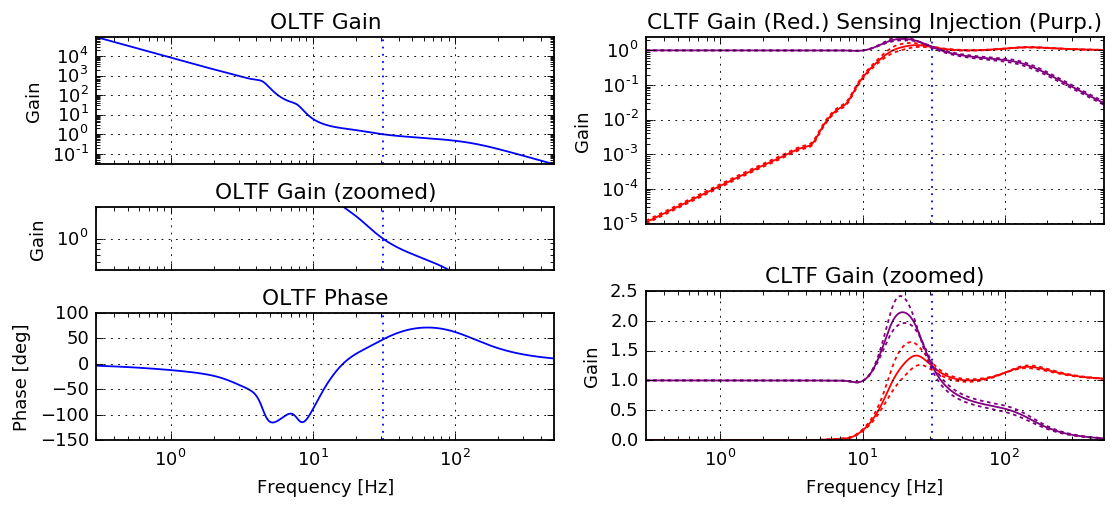

In [5]:
F = logspaced(.3, 500, 1000)

Fx, hd = scipy.signal.freqresp(
    power_loops.controller_fast_2p5x1e1(UGF = 30.), 
    F)

axF = plot_loop(F, hd, full = True, inv = False)


In [22]:
z,p,k = power_loops.controller_fast_2p5x1e1(UGF = 500.)

TypeError: controller_fast_2p5x1e1() got an unexpected keyword argument 'shift'

In [21]:
z

array([  -26.04561874 +76.56143533j,   -52.09123749  -0.j        ,
         -26.04561874 -76.56143533j,  -101.01525446+101.01525446j,
        -101.01525446-101.01525446j,   -45.57983280+133.98251182j,
         -91.15966560  -0.j        ,   -45.57983280-133.98251182j,
        -125.00000000+216.50635095j,  -250.00000000  -0.j        ,
        -125.00000000-216.50635095j,  -300.00000000+187.5j       ,
        -300.00000000-187.5j       ,   -62.50000000 -62.5j       ,
         -62.50000000 +62.5j       ,  -240.00000000-300.j        ,
        -240.00000000+300.j        ,   -75.00000000-150.j        ,
         -75.00000000+150.j        , -1500.00000000  +0.j        ])

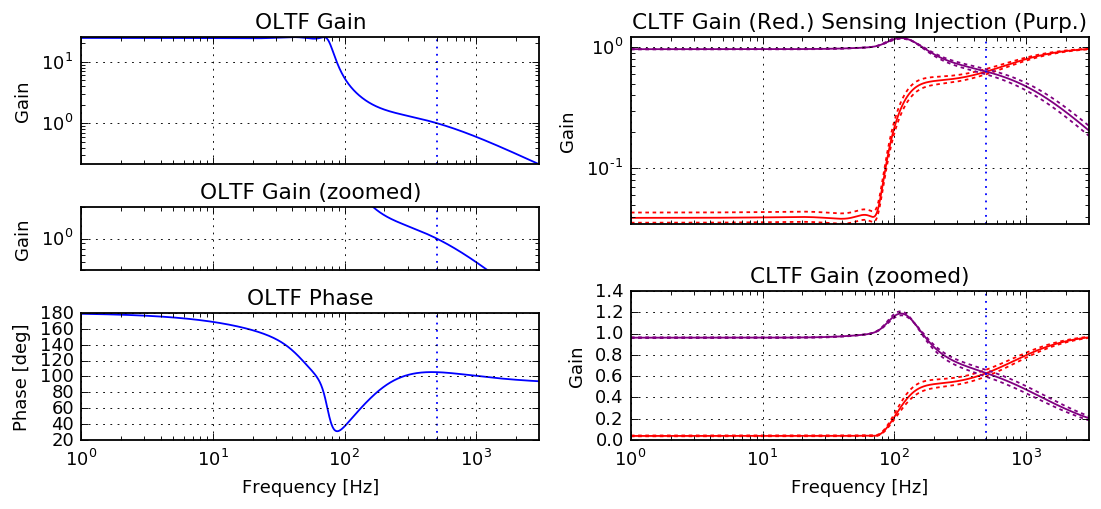

In [75]:
zpk = power_loops.ledge_controller(shift = 7, F_center=500, N = 3)

F = logspaced(1, 3000, 1000)
Fx, hd = scipy.signal.freqresp( zpk, F)
axF = plot_loop(F, hd, full = True, inv = False)

In [76]:
zpk

(array([ -26.04561874 +76.56143533j,  -52.09123749  -0.j        ,
         -26.04561874 -76.56143533j, -101.01525446+101.01525446j,
        -101.01525446-101.01525446j]),
 array([  -9.20714117+73.60574677j,  -24.10460853+45.49085327j,
         -29.79493471 -0.j        ,  -24.10460853-45.49085327j,
          -9.20714117-73.60574677j, -421.12001322 -0.j        ]),
 array([ 644.87861154]))

In [43]:
def root_str(roots):
    roots = list(roots)
    roots.sort(key = lambda r:(abs(r.imag), r.imag))
    rs = []
    for r in roots:
        if r.imag > 0:
            rs.append("{0} + i*{1}".format(r.real, r.imag))
        elif r.imag < 0:
            rs.append("{0} - i*{1}".format(r.real, -r.imag))
        else:
            rs.append("{0}".format(r.real))
    return ';\n'.join(rs)

def zpk2foton(zpk):
    z,p,k = zpk
    return """
zpk(
[{0}], 
[{1}], 
{2})
    """.format(root_str(z), root_str(p), float(k))

print(zpk2foton(zpk))


zpk(
[-72.92773248;
-36.46386624 - i*107.18600946;
-36.46386624 + i*107.18600946;
-141.42135624 - i*141.42135624;
-141.42135624 + i*141.42135624], 
[-589.56801851;
-33.74645194 - i*63.68719458;
-33.74645194 + i*63.68719458;
-12.88999764 - i*103.04804548;
-12.88999764 + i*103.04804548], 
747.96331644)
    



zpk(
[-52.09123749;
-26.04561874 - i*76.56143533;
-26.04561874 + i*76.56143533;
-101.01525446 - i*101.01525446;
-101.01525446 + i*101.01525446], 
[-421.12001322;
-24.10460853 - i*45.49085327;
-24.10460853 + i*45.49085327;
-9.20714117 - i*73.60574677;
-9.20714117 + i*73.60574677], 
644.87861154)
    


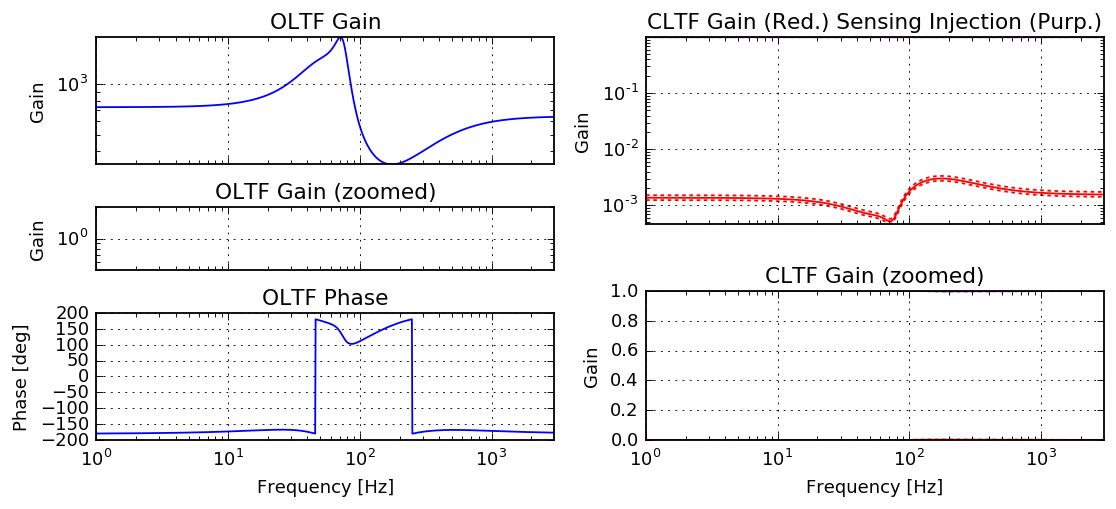

In [64]:
zpk1 = (array([ -26.04561874 +76.56143533j,  -52.09123749  -0.j        ,
         -26.04561874 -76.56143533j, -101.01525446+101.01525446j,
        -101.01525446-101.01525446j]),
 array([  -9.20714117+73.60574677j,  -24.10460853+45.49085327j,
         #-29.79493471 -0.j        ,
        -24.10460853-45.49085327j,
          -9.20714117-73.60574677j, -421.12001322 -0.j        ]),
 array([ 644.87861154]))

F = logspaced(1, 3000, 1000)
Fx, hd = scipy.signal.freqresp( zpk1, F)
axF = plot_loop(F, hd, full = True, inv = False)

print(zpk2foton(zpk1))


zpk(
[-36.46386624078418;
-100.0;
-18.231933120392092 - i*53.59300472934271;
-18.231933120392092 + i*53.59300472934271;
-120.0 - i*75.0;
-120.0 + i*75.0;
-50.000000000000014 - i*86.60254037844386;
-50.000000000000014 + i*86.60254037844386], 
[-20.856454300460648;
-294.78400925404077;
-16.873225971477122 - i*31.843597289470754;
-16.873225971477122 + i*31.843597289470754;
-6.444998821246796 - i*51.524022738427696;
-6.444998821246796 + i*51.524022738427696;
-60.0 - i*75.0;
-60.0 + i*75.0], 
1.1048632481969547)
    


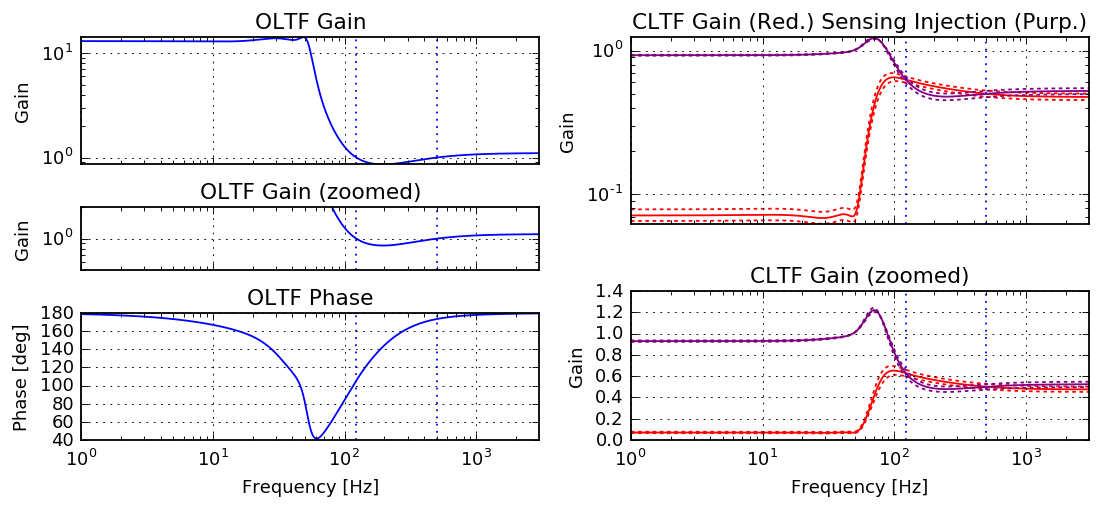

In [65]:
zpk2 = power_loops.ledge_boost(shift = 10, F_center=500)
print(zpk2foton(zpk2))

F = logspaced(1, 3000, 1000)
Fx, hd = scipy.signal.freqresp( zpk2, F)
axF = plot_loop(F, hd, full = True, inv = False)

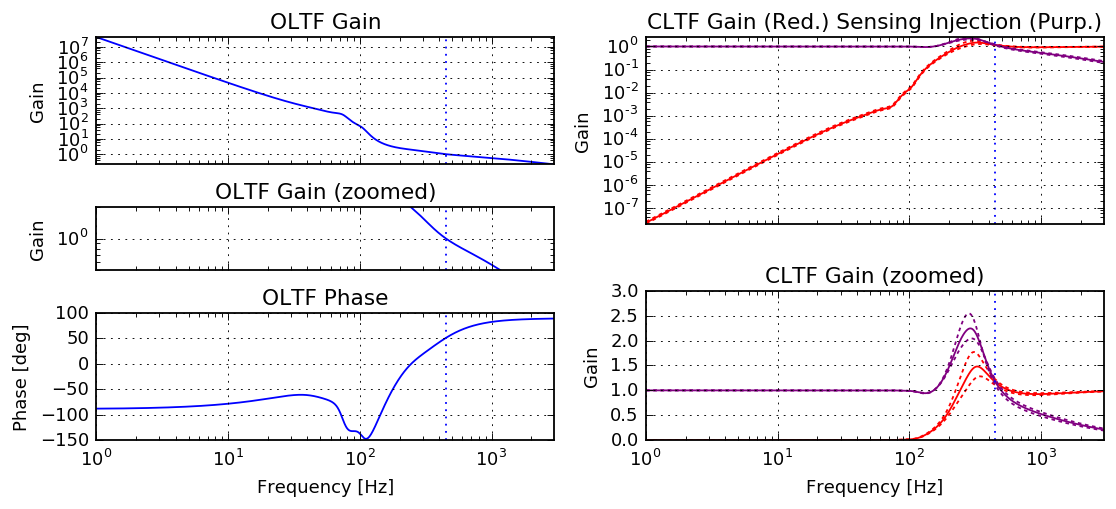

In [105]:
F = logspaced(1, 3000, 1000)
UGF = 400
pp = np.array([-UGF*.8 - UGF * 1j, -UGF*.8 + UGF * 1j])
zp = np.array([-UGF*.5 - UGF * 1j, -UGF*.5 + UGF * 1j])

zpk2 = power_loops.ledge_boost(F_center = UGF, shift = 4., N =3)

zpk3 = power_loops.zpk_mult(
        ((-UGF/8. - UGF * 1j/8., -UGF/8. + UGF * 1j/8), (-.001, -.001), 1.0),
        (pp * .6, zp * .6, .8),
        (zp * .3, pp * .3, 1.0),
)
Fx, hd = scipy.signal.freqresp( power_loops.zpk_mult(
        #power_loops.ledge_controller(F_center = UGF, shift = 7, N =3),
        zpk1,
        zpk2,
        zpk3,
        ([],[-.01,], [1]),
        #((-UGF*3,), (-UGF * 3 - 3j*UGF,-UGF * 3 + 3j*UGF), 15*(180))
), F)
axF = plot_loop(F, hd, full = True, inv = False)


In [106]:
print(zpk2foton(zpk1))
print(zpk2foton(zpk2))
print(zpk2foton(zpk3))


zpk(
[-52.09123749;
-26.04561874 - i*76.56143533;
-26.04561874 + i*76.56143533;
-101.01525446 - i*101.01525446;
-101.01525446 + i*101.01525446], 
[-421.12001322;
-24.10460853 - i*45.49085327;
-24.10460853 + i*45.49085327;
-9.20714117 - i*73.60574677;
-9.20714117 + i*73.60574677], 
644.87861154)
    

zpk(
[-72.92773248156836;
-200.0;
-36.463866240784185 - i*107.18600945868542;
-36.463866240784185 + i*107.18600945868542;
-240.0 - i*150.0;
-240.0 + i*150.0;
-100.00000000000003 - i*173.20508075688772;
-100.00000000000003 + i*173.20508075688772], 
[-41.712908600921295;
-589.5680185080815;
-33.746451942954245 - i*63.68719457894151;
-33.746451942954245 + i*63.68719457894151;
-12.889997642493592 - i*103.04804547685539;
-12.889997642493592 + i*103.04804547685539;
-120.0 - i*150.0;
-120.0 + i*150.0], 
1.2847456411081404)
    

zpk(
[-50.0 - i*50.0;
-50.0 + i*50.0;
-60.0 - i*120.0;
-60.0 + i*120.0;
-192.0 - i*240.0;
-192.0 + i*240.0], 
[-0.001;
-0.001;
-96.0 - i*120.0;
-96.0 + i*120.0;
-120.0 -